Use Optuna to automate hyperparameter tuning for a Random Forest Classifier


In [ ]:
#import all the necessary libraries:
import optuna
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#we will load the titanic dataset

data = sns.load_dataset("titanic").dropna()


The next step is data preprocessing before using optuna for hyperparmeter tuning.

In [3]:
X = data.drop(columns=["survived"])
y = data["survived"]
X = pd.get_dummies(X, drop_first=True) #converts categorical variables into a numerical format using one-hot encoding.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
#splitting the dataset into 30-70 ratio for testing and training.

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 200)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    
    model = RandomForestClassifier(
        n_estimators=n_estimators, 
        max_features=max_features,
        min_samples_split=min_samples_split,
        random_state=42
    )
    
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score


Now we will use Optuna to automate the hyperparamter tuning 
The code works here in the following manner:
1.Optuna starts with a random set of hyperparameters.
2.It evaluates model accuracy using cross-validation. (here, not always)
3.It uses Bayesian optimization to explore better hyperparameters in later trials.
4.After 20 trials, it finds the best hyperparameter combination. (you can adjust the number of trials as per convenience.)


In [5]:
study = optuna.create_study(direction="maximize") 
#maximize because we have accuracy as the objective function here, if it had been loss we would use minimize.
study.optimize(objective, n_trials=20) #run 20 trials.

[I 2025-03-30 19:07:06,926] A new study created in memory with name: no-name-cd278da1-dbd2-4985-b886-0beaca36b9db


[I 2025-03-30 19:07:08,844] Trial 0 finished with value: 0.976 and parameters: {'n_estimators': 178, 'max_features': 'sqrt', 'min_samples_split': 8}. Best is trial 0 with value: 0.976.
[I 2025-03-30 19:07:11,854] Trial 1 finished with value: 0.976 and parameters: {'n_estimators': 191, 'max_features': 'sqrt', 'min_samples_split': 10}. Best is trial 0 with value: 0.976.
[I 2025-03-30 19:07:14,313] Trial 2 finished with value: 0.984 and parameters: {'n_estimators': 137, 'max_features': 'log2', 'min_samples_split': 5}. Best is trial 2 with value: 0.984.
[I 2025-03-30 19:07:16,831] Trial 3 finished with value: 0.984 and parameters: {'n_estimators': 161, 'max_features': 'sqrt', 'min_samples_split': 6}. Best is trial 2 with value: 0.984.
[I 2025-03-30 19:07:17,707] Trial 4 finished with value: 1.0 and parameters: {'n_estimators': 82, 'max_features': None, 'min_samples_split': 7}. Best is trial 4 with value: 1.0.
[I 2025-03-30 19:07:19,372] Trial 5 finished with value: 1.0 and parameters: {'n_

In [6]:
#now we train the model on the best parameters

best_params = study.best_params
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

C:\Users\hp\AppData\Local\Temp\ipykernel_3036\119804481.py:2: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


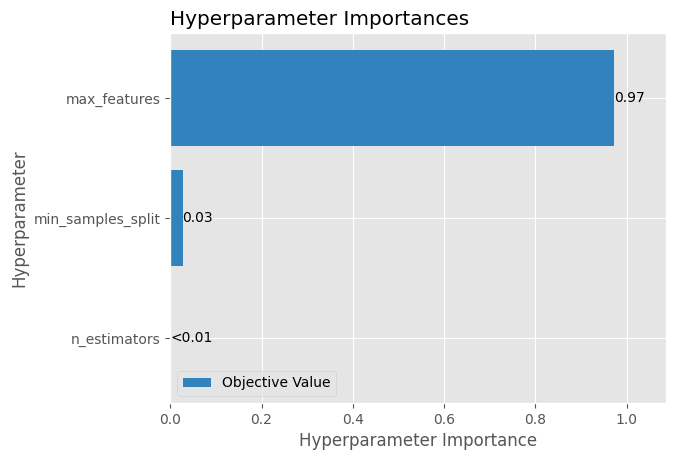

In [10]:
#Plot the results 
optuna.visualization.matplotlib.plot_param_importances(study)
plt.show()

This is important because:
Helps you focus on the most important hyperparameters and You can reduce tuning time by ignoring less impactful parameters.

In [8]:

print("Best hyperparameters:", best_params)
print("Test Accuracy:", accuracy)


Best hyperparameters: {'n_estimators': 82, 'max_features': None, 'min_samples_split': 7}
Test Accuracy: 1.0
